# Exploratory Data Analysis (EDA)


> Here i'll be taking a deep dive into the cleaned data to look for insights part of the technique i'll be using at this stage is `Data Visualization`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_reviews.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   rating_over_10                1596 non-null   int64 
 1   review_author                 1596 non-null   object
 2   review_date                   1596 non-null   object
 3   author_country                1596 non-null   object
 4   review_title                  1596 non-null   object
 5   reviewer_verification_status  1596 non-null   bool  
 6   reviewer_text                 1596 non-null   object
 7   reviewer_text_clean           1596 non-null   object
 8   reviewer_text_lemmatized      1596 non-null   object
dtypes: bool(1), int64(1), object(7)
memory usage: 101.4+ KB


In [4]:
df.isnull().sum()

rating_over_10                  0
review_author                   0
review_date                     0
author_country                  0
review_title                    0
reviewer_verification_status    0
reviewer_text                   0
reviewer_text_clean             0
reviewer_text_lemmatized        0
dtype: int64

In [5]:
df['rating_over_10'].value_counts()

1     523
2     227
3     204
10    115
8     104
4     103
5      97
9      93
7      74
6      56
Name: rating_over_10, dtype: int64

In [6]:
df.describe()

,rating_over_10
count,1596.000000
mean,3.859023
std,3.056755
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,10.000000


In [7]:
#writing a function for the plot in order to avoid duplicates
def plot_attributes():
    print(" ")
    
#data setup    
    
    plt.figure(figsize=[10, 8])
    
    base_color = sb.color_palette()[0]

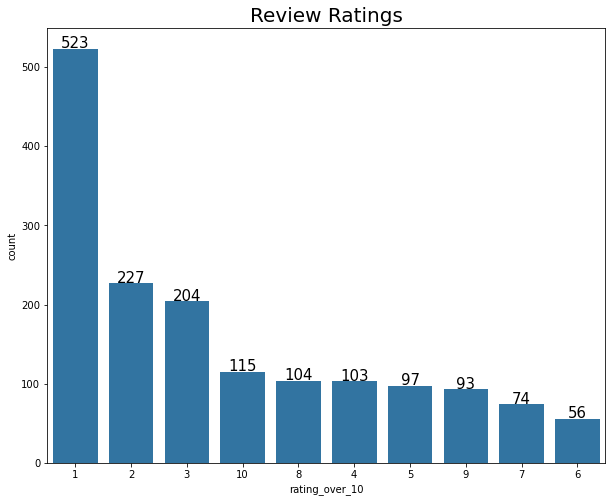

In [8]:
plot_attributes()

base_color = sb.color_palette()[0]

high_order = df['rating_over_10'].value_counts().index
counts= df['rating_over_10'].value_counts()

ax = sb.countplot(data = df, x ='rating_over_10', color = base_color, order = high_order)
for i, count in enumerate(counts):
    ax.text(i, count + 1, str(count), ha='center', fontsize=15)   
    

plt.title('Review Ratings', {'fontsize': 20})
plt.show();



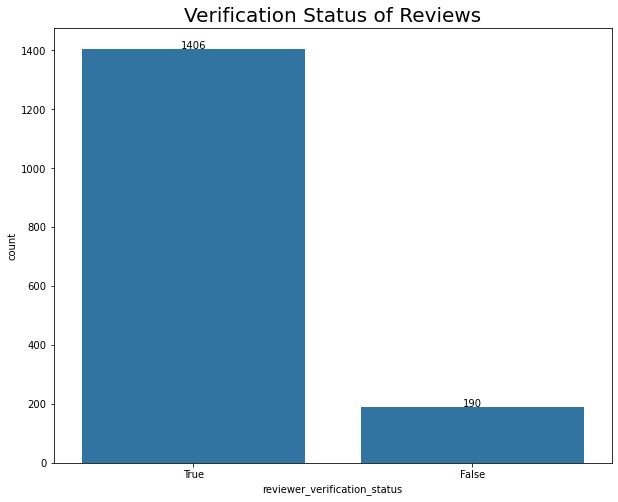

In [9]:
plot_attributes()

high_order = df['reviewer_verification_status'].value_counts().index

counts= df['reviewer_verification_status'].value_counts()

ax = sb.countplot(data = df, x = 'reviewer_verification_status', color = base_color, order=high_order)

for i, count in enumerate(counts):
    ax.text(i, count + 1, str(count), ha='center', fontsize=10)    

plt.title('Verification Status of Reviews', {'fontsize': 20})
plt.show();

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   rating_over_10                1596 non-null   int64 
 1   review_author                 1596 non-null   object
 2   review_date                   1596 non-null   object
 3   author_country                1596 non-null   object
 4   review_title                  1596 non-null   object
 5   reviewer_verification_status  1596 non-null   bool  
 6   reviewer_text                 1596 non-null   object
 7   reviewer_text_clean           1596 non-null   object
 8   reviewer_text_lemmatized      1596 non-null   object
dtypes: bool(1), int64(1), object(7)
memory usage: 101.4+ KB


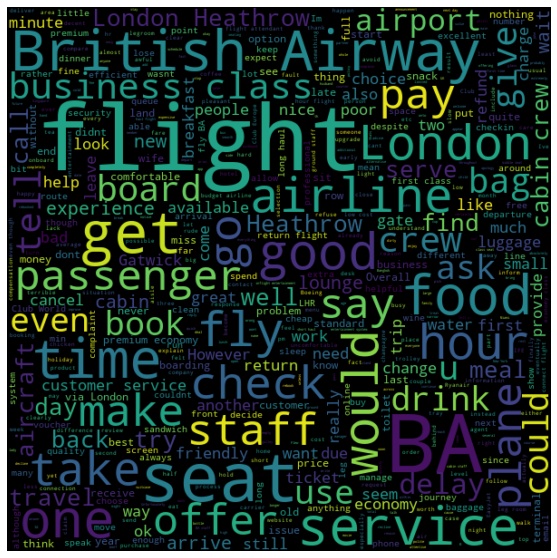

In [11]:
import nltk
from nltk.corpus import stopwords
from PIL import ImageFont, ImageDraw

# Start with one review:
reviews = " ".join(df.reviewer_text_lemmatized)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most of the common words are generic and can't be used to determine if the reviewers comments are positive or negative. So i'll be adding these words to my stopwords to give room for other words

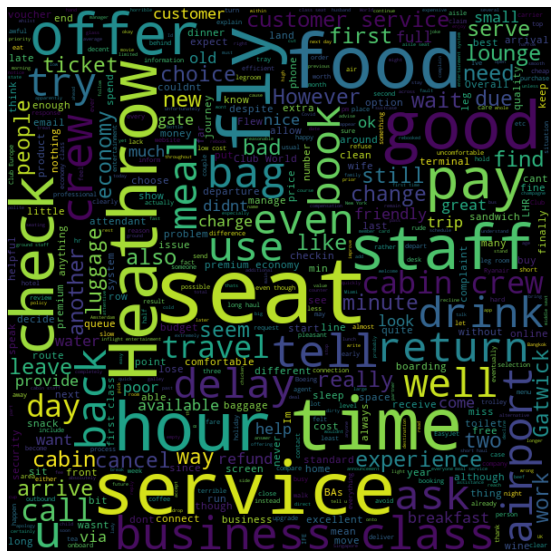

In [12]:
import nltk
from nltk.corpus import stopwords
from PIL import ImageFont, ImageDraw

# Start with one review:
reviews = " ".join(df.reviewer_text_lemmatized)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["BA","flight", "British","Airway", "Airways", "airline","plane", "board","airline","passenger",
                 "London", "give", "aircraft","get","go","one","say","would", "make","take", "could"])

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['reviewer_text_lemmatized'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,rating_over_10,review_author,review_date,author_country,review_title,reviewer_verification_status,reviewer_text,reviewer_text_clean,reviewer_text_lemmatized,Sentiment,Analysis
0,5,G Jones,2023-04-28,United Kingdom,"""premium price for very average service""",False,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business c...,Regarding the aircraft and seat The business c...,-0.7884,Negative
1,1,Michelle Morgan,2023-04-26,Sweden,"""lack of customer service""",False,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden t...,I travel with British Airways from Sweden to L...,-0.6965,Negative
2,2,Srinivasan Balaji,2023-04-24,United States,"""Overall not a good airline""",False,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian ...,Food be lousy Who ever be plan the Asian Hindu...,-0.7476,Negative
3,1,P Patel,2023-04-24,Canada,"""delayed and missed connecting flight""",True,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Londo...,Had the bad experience The flight from London ...,-0.6459,Negative
4,1,C Mayre,2023-04-23,Ireland,"""!not a good experience""",True,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like al...,The ground staff be not helpful Felt like all ...,-0.8421,Negative


In [14]:
#at this stage i'll just drop some columns i don't need

df.drop(columns = ['review_author', 'reviewer_text', 'reviewer_text_clean'], inplace=True)

In [15]:
df

,rating_over_10,review_date,author_country,review_title,reviewer_verification_status,reviewer_text_lemmatized,Sentiment,Analysis
0,5,2023-04-28,United Kingdom,"""premium price for very average service""",False,Regarding the aircraft and seat The business c...,-0.7884,Negative
1,1,2023-04-26,Sweden,"""lack of customer service""",False,I travel with British Airways from Sweden to L...,-0.6965,Negative
2,2,2023-04-24,United States,"""Overall not a good airline""",False,Food be lousy Who ever be plan the Asian Hindu...,-0.7476,Negative
3,1,2023-04-24,Canada,"""delayed and missed connecting flight""",True,Had the bad experience The flight from London ...,-0.6459,Negative
4,1,2023-04-23,Ireland,"""!not a good experience""",True,The ground staff be not helpful Felt like all ...,-0.8421,Negative
...,...,...,...,...,...,...,...,...
1591,3,2016-03-26,United Kingdom,"""same leg room as in Economy""",True,Istanbul to London Heathrow with British Airwa...,0.8270,Positive
1592,8,2016-03-25,Switzerland,"""friendly and efficient service""",True,London Heathrow to Houston on British Airways ...,0.9472,Positive
1593,1,2016-03-24,United Kingdom,"""BA.com been truly appalling""",True,We have fly with British Airways over time usu...,0.7133,Positive
1594,7,2016-03-23,South Africa,"""overall experience was pleasant""",True,British Airways from Seattle to Johannesburg v...,0.9387,Positive


In [16]:
df['Analysis'].value_counts()

Negative    788
Positive    659
Neutral     149
Name: Analysis, dtype: int64

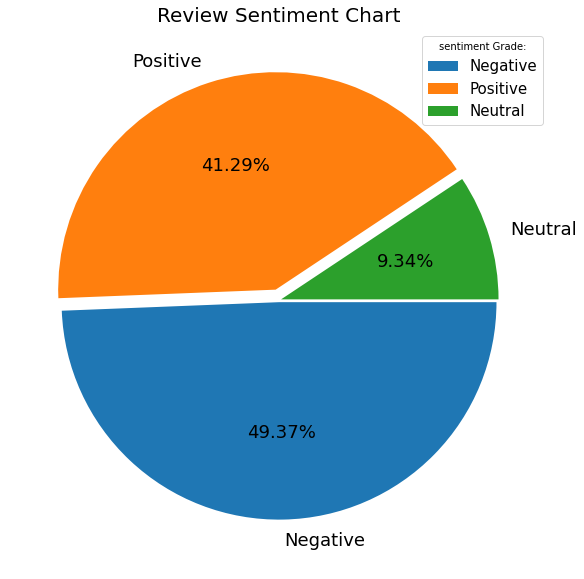

In [17]:
#plotting the credit grade on a pie chart 
plt.figure(figsize=[10, 10])

sorted_index = df['Analysis'].value_counts()

plt.pie(sorted_index, labels = sorted_index.index, counterclock = False, autopct='%1.2f%%', textprops={'fontsize': 18},
        explode=[0.01, 0.05, 0.01])
plt.title('Review Sentiment Chart', {'fontsize':20})
plt.legend(title = 'sentiment Grade:', fontsize=15)
plt.show();

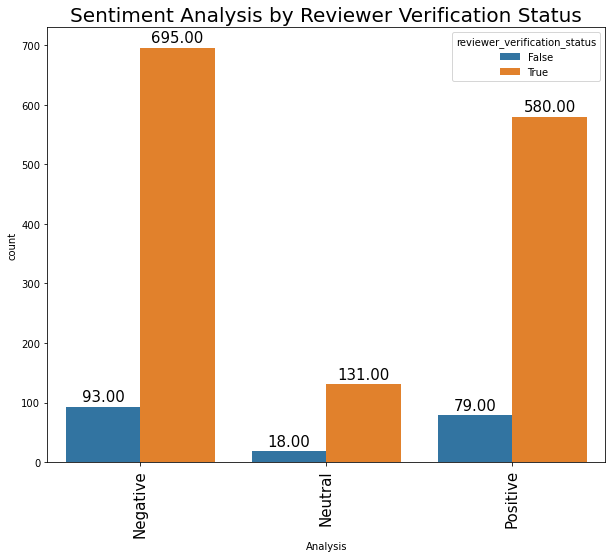

In [18]:
plot_attributes()

counts= df.groupby(['Analysis', 'reviewer_verification_status']).size().reset_index(name='count')
chart = sb.barplot(data=counts, x='Analysis', y='count', hue='reviewer_verification_status')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontsize=15)
for p in chart.patches:
    chart.annotate("{:,.2f}".format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=15)
    
plt.title('Sentiment Analysis by Reviewer Verification Status', {'fontsize':20})
plt.show()

In [22]:
#Filter the dataframe based on the analysis column using boolean indexing

positive_reviews = df[df['Analysis'] == 'Positive']
negative_reviews = df[df['Analysis'] == 'Negative']
neutral_reviews = df[df['Analysis'] == 'Neutral']

In [23]:
#Concatenate the text from the filtered reviews[reviewer_text_lemmatized] into a single string for each category

positive_text = ' '.join(positive_reviews['reviewer_text_lemmatized'].tolist())
negative_text = ' '.join(negative_reviews['reviewer_text_lemmatized'].tolist())
neutral_text = ' '.join(neutral_reviews['reviewer_text_lemmatized'].tolist())

In [24]:
#Perform word frequency analysis using a library like nltk:

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [25]:
positive_tokens = word_tokenize(positive_text)
positive_freq = FreqDist(positive_tokens)

negative_tokens = word_tokenize(negative_text)
negative_freq = FreqDist(negative_tokens)

neutral_tokens = word_tokenize(neutral_text)
neutral_freq = FreqDist(neutral_tokens)

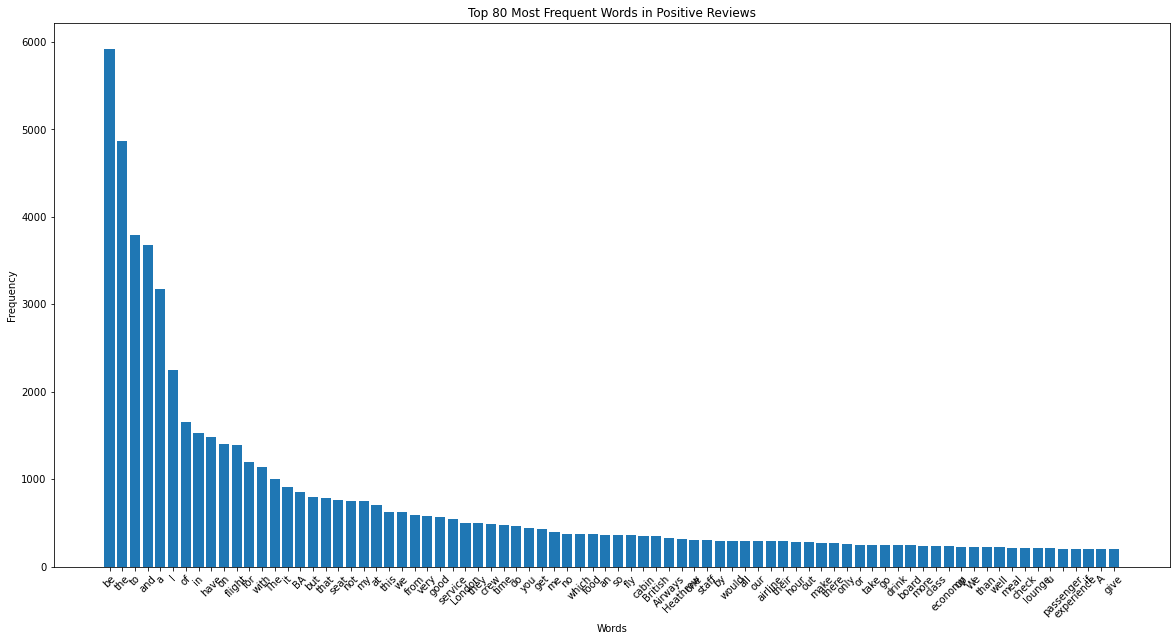

In [26]:
N = 80  # Number of words to display
words = [word for word, freq in positive_freq.most_common(N)]
frequencies = [freq for word, freq in positive_freq.most_common(N)]

plt.figure(figsize=(20, 10))

plt.bar(words, frequencies)
plt.title('Top {} Most Frequent Words in Positive Reviews'.format(N))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

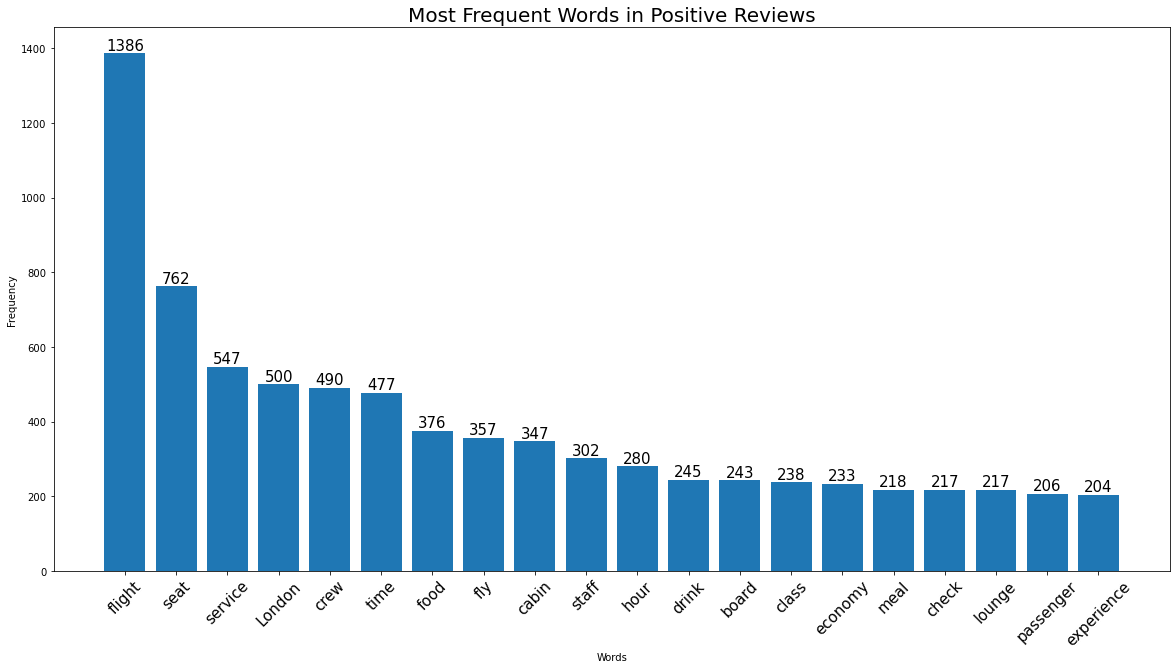

In [51]:
from nltk.corpus import stopwords


N = 80  # Number of words to display
words = [word for word, freq in positive_freq.most_common(N)]
frequencies = [freq for word, freq in positive_freq.most_common(N)]


stopwords = set(stopwords.words('english'))
stopwords.update(["be","the", "to","and", "I", "of","in", "have","on","for", "very", "do", "you", "get", "British", "We",
                 "with", "The", "it","but","that","not","my","at", "this","we", "from", "Airways", "would", "our",
                 "airline", "their", "BA", "good", "one", "Heathrow", "make", "take", "go", "we", "well", "u", "A", "give"])



# Apply stopwords to word frequencies
filtered_words = [word for word in words if word not in stopwords]

# Filter the corresponding frequencies based on the filtered words
filtered_frequencies = [freq for word, freq in positive_freq.most_common(N) if word in filtered_words]


# Plotting the filtered words
plt.figure(figsize=(20, 10))

chart = plt.bar(filtered_words, filtered_frequencies)

for i, rect in enumerate(chart):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 9, str(height), ha='center', fontsize=15)
 
    
plt.title('Most Frequent Words in Positive Reviews', {'fontsize':20})
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, fontsize=15)
plt.show()





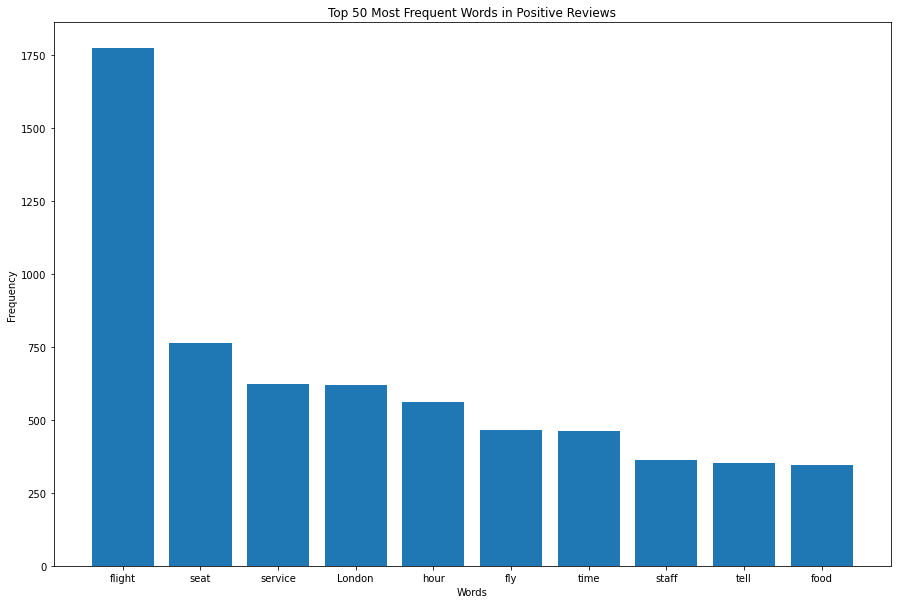

In [28]:
from nltk.corpus import stopwords


N = 50  # Number of words to display
words = [word for word, freq in negative_freq.most_common(N)]
frequencies = [freq for word, freq in negative_freq.most_common(N)]


stopwords = set(stopwords.words('english'))
stopwords.update(["be","the", "to","and", "I", "of","in", "have","on","for", "very", "do", "you", "get", "British",
                 "with", "The", "it","but","that","not","my","at", "this","we", "from", "Airways", "would", "our",
                 "airline", "their", "BA", "good", "one", "Heathrow"])



# Apply stopwords to word frequencies
filtered_words = [word for word in words if word not in stopwords]

# Filter the corresponding frequencies based on the filtered words
filtered_frequencies = [freq for word, freq in negative_freq.most_common(N) if word in filtered_words]


# Plotting the filtered words
plt.figure(figsize=(15, 10))

chart = plt.bar(filtered_words, filtered_frequencies)

   
    
    
plt.title('Top {} Most Frequent Words in Positive Reviews'.format(N))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks()
plt.show()




